In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import linearRegression as lreg
rcParams['figure.figsize']=10,8

In [2]:
df = pd.read_excel('AirQualityUCI.xlsx')
df

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,2005-04-04,10:00:00,3.1,1314.25,-200,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250000,0.756824
9353,2005-04-04,11:00:00,2.4,1162.50,-200,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725000,0.711864
9354,2005-04-04,12:00:00,2.4,1142.00,-200,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350000,0.640649
9355,2005-04-04,13:00:00,2.1,1002.50,-200,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550000,0.513866


In [3]:
df.dropna(inplace=True)

In [4]:
df.shape

(9357, 15)

In [5]:
df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.869652,-159.090093,1.865576,894.475963,168.604200,794.872333,58.135898,1391.363266,974.951534,9.776600,39.483611,-6.837604
std,77.657170,329.817015,139.789093,41.380154,342.315902,257.424561,321.977031,126.931428,467.192382,456.922728,43.203438,51.215645,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,4.004958,711.000000,50.000000,637.000000,53.000000,1184.750000,699.750000,10.950000,34.050000,0.692275
50%,1.500000,1052.500000,-200.000000,7.886653,894.500000,141.000000,794.250000,96.000000,1445.500000,942.000000,17.200000,48.550000,0.976823
75%,2.600000,1221.250000,-200.000000,13.636091,1104.750000,284.200000,960.250000,133.000000,1662.000000,1255.250000,24.075000,61.875000,1.296223
max,11.900000,2039.750000,1189.000000,63.741476,2214.000000,1479.000000,2682.750000,339.700000,2775.000000,2522.750000,44.600000,88.725000,2.231036


In [6]:
df.dtypes

Date             datetime64[ns]
Time                     object
CO(GT)                  float64
PT08.S1(CO)             float64
NMHC(GT)                  int64
C6H6(GT)                float64
PT08.S2(NMHC)           float64
NOx(GT)                 float64
PT08.S3(NOx)            float64
NO2(GT)                 float64
PT08.S4(NO2)            float64
PT08.S5(O3)             float64
T                       float64
RH                      float64
AH                      float64
dtype: object

In [7]:
df["Date"]=df["Date"].dt.month
df["Date"]

0       3
1       3
2       3
3       3
4       3
       ..
9352    4
9353    4
9354    4
9355    4
9356    4
Name: Date, Length: 9357, dtype: int64

In [8]:
df['Time']=df['Time'].apply(lambda x: str(x).split(":")[0])

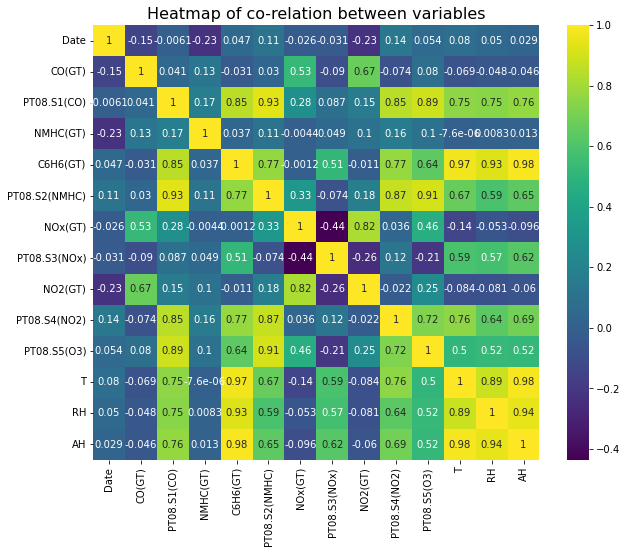

In [9]:
sns.heatmap(df.corr(),annot=True,cmap='viridis')
plt.title('Heatmap of co-relation between variables',fontsize=16)
plt.show()

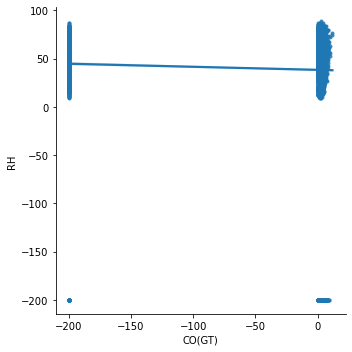

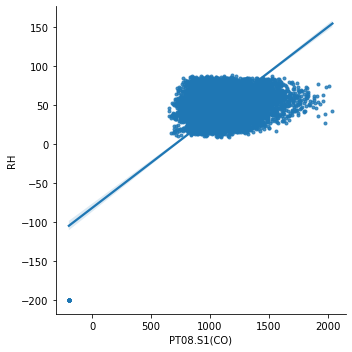

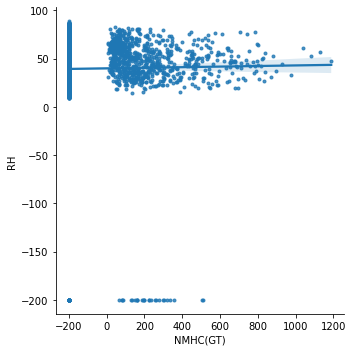

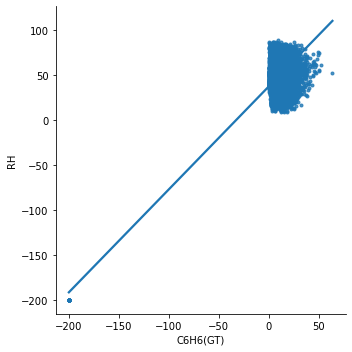

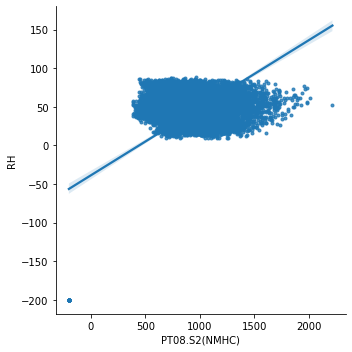

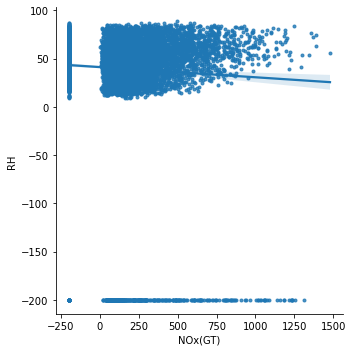

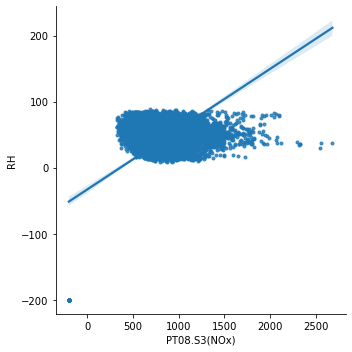

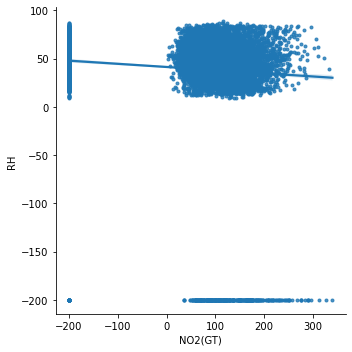

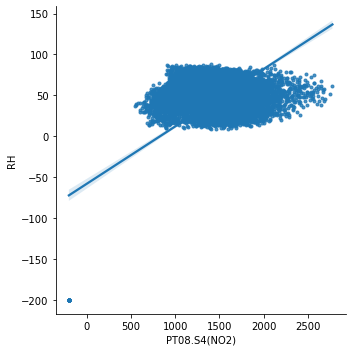

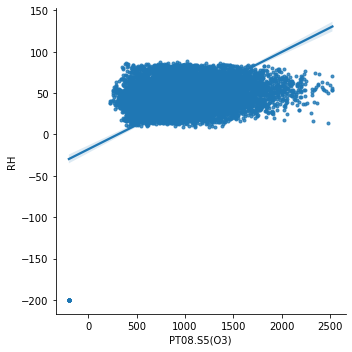

In [10]:
col_=df.columns.tolist()[2:12]
for i in col_:
    sns.lmplot(x=i,y='RH',data=df,markers='.')

In [11]:
arr=df.to_numpy()
X=arr[:,2:12]
Y=arr[:,13]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)

In [12]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)
print("After Normalisation:")
print(X_train)

After Normalisation:
[[0.95658329 0.67842393 0.33909287 ... 0.57809894 0.64563025 0.43733358]
 [0.96177442 0.68835808 0.         ... 0.73374097 0.51487395 0.7366633 ]
 [0.9499764  0.50541355 0.         ... 0.61070965 0.34285714 0.31952989]
 ...
 [0.94808872 0.47639245 0.         ... 0.55660552 0.34478992 0.24433018]
 [0.96271826 0.74796294 0.         ... 0.58365759 0.71411765 0.63547884]
 [0.9589429  0.62049336 0.         ... 0.59106911 0.72823529 0.4612065 ]]


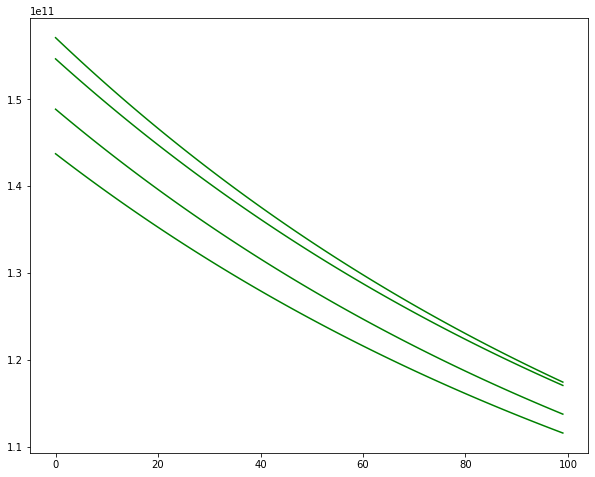

In [13]:
theta1=lreg.fitGD(X_train,Y_train,0.001,1,0,100)
theta2=lreg.fitGD(X_train,Y_train,0.001,1,1,100)
theta3=lreg.fitGD(X_train,Y_train,0.001,1,2,100)
theta4=lreg.fitGD(X_train,Y_train,0.001,1,3,100)

In [14]:
X_train1= np.concatenate((np.ones((np.shape(X_train)[0], 1)), X_train), axis=1)
Y_pred_train=X_train1@theta1
trainErrorGD=pow(Y_pred_train-Y_train,2)/2*(len(X_train))

In [15]:
X_test1= np.concatenate((np.ones((np.shape(X_test)[0], 1)), X_test), axis=1)

In [19]:
Y_predict_test=X_test1@theta1
testErrorGD=pow(Y_predict_test-Y_test,2)/2*(len(X_test))
thetaN=theta=np.linalg.inv(X_train.T.dot(X_train)).dot(X_train.T).dot(Y_train)
Y_predict_train=X_train@thetaN
trainErrorN=pow(Y_predict_train-Y_train,2)/2*(len(X_train))
Y_pred_test=X_test@thetaN
testErrorN=pow(Y_pred_test-Y_test,2)/2*(len(X_test))

In [20]:
testErrorGD
testErrorN

array([33684.4616595115, 680007.1107698755, 7145.721282921846,
       1760.6366215890089, 73361.08357338957, 118465.92501468542,
       56400.89280874534, 303747.4201595992, 551334.8488839471,
       7997.813653667495, 167714.44210438526, 141611.19269827014,
       880069.7272022994, 451669.50168400974, 4676.6313776390325,
       1851.0961697890705, 78952.3253767103, 4363.291264088279,
       475630.2097156912, 172840.26512517026, 274834.71824707265,
       211430.45299438917, 36688.21873775058, 73950.80294308378,
       8356.256777989192, 31842.021851137895, 159916.19082902203,
       240527.49456468094, 10873856.494857227, 53880.19166012834,
       145236.85550342023, 686.8157044958001, 26053.28742487261,
       275049.2822629523, 498445.73387722205, 33991.3549442095,
       329970.67423166515, 60.28126342866533, 12615.772665876024,
       30143.209690044743, 13116.40102159642, 1275235.695813921,
       106545.92466647197, 647202.0064865939, 629.1053410387908,
       216337.040551885